# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


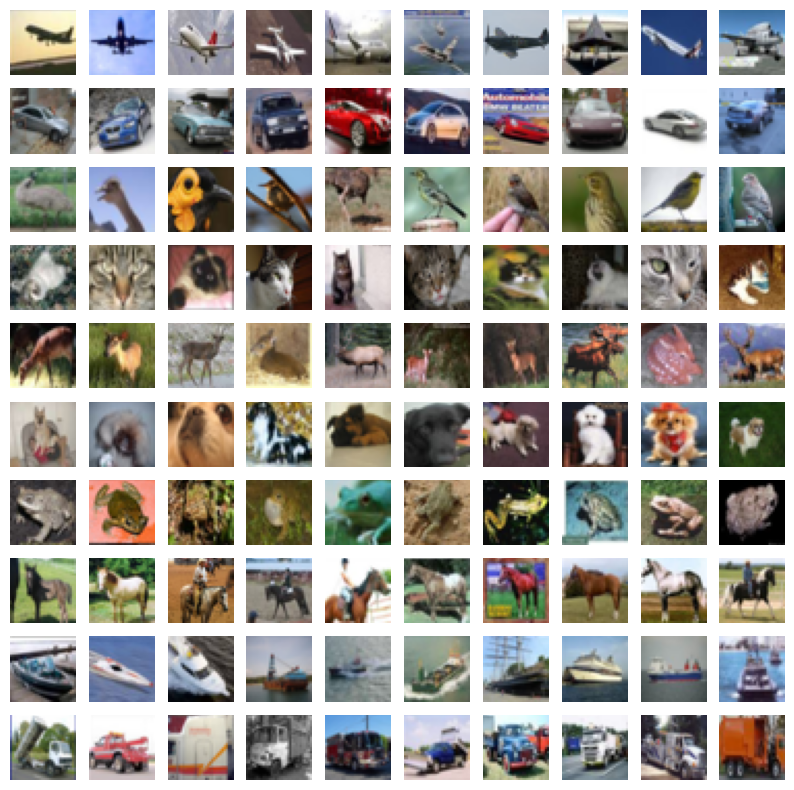

In [16]:
# Visualize the images
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        # Get random image index for class i
        idx = np.random.choice(np.where(y_train == i)[0])
        axes[i, j].imshow(x_train[idx])
        axes[i, j].axis('off')
plt.show()

# Convert labels to one-hot encoded form
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [19]:
x_train.shape

(50000, 32, 32, 3)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential( #This creates a linear stack of layers for our model.
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), # This layer flattens the output from the previous layer into a single vector
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [21]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.1477 - loss: 2.2892 - val_accuracy: 0.2195 - val_loss: 2.2141
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2292 - loss: 2.1845 - val_accuracy: 0.2709 - val_loss: 2.0978
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2820 - loss: 2.0633 - val_accuracy: 0.2947 - val_loss: 1.9991
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3123 - loss: 1.9777 - val_accuracy: 0.3164 - val_loss: 1.9339
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3303 - loss: 1.9163 - val_accuracy: 0.3402 - val_loss: 1.8930
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3457 - loss: 1.8823 - val_accuracy: 0.3454 - val_loss: 1.8712
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3544 - loss: 1.8557 - val_accuracy: 0.3540 - val_loss: 1.8337
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3683 - loss: 1.8215 - val_accuracy: 0.3521 - val_

*   Plot the cross entropy loss curve and the accuracy curve

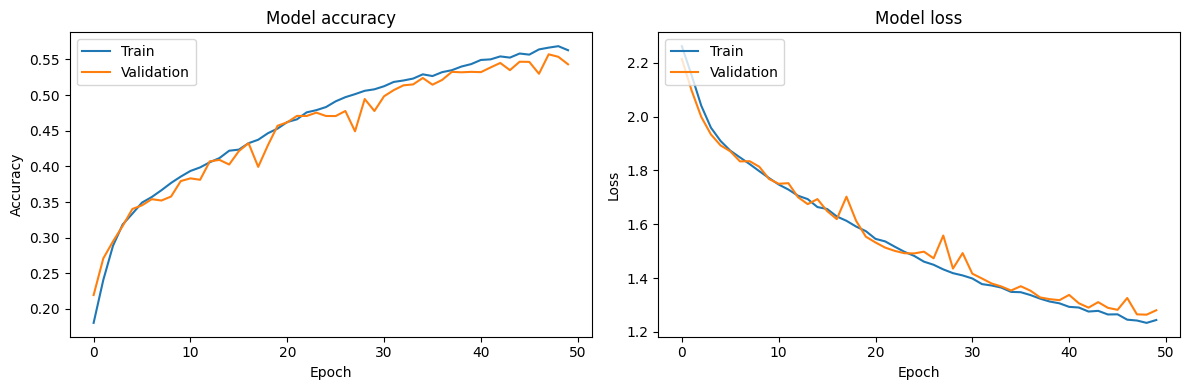

In [22]:
import matplotlib.pyplot as plt

# Assuming you have trained the model and stored the history in 'history'

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Create a subplot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)  # Create a subplot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [7]:
from keras.backend import clear_session
clear_session()

In [26]:
from keras.backend import clear_session
clear_session()

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)



*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [30]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
history_1 = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6475 - loss: 1.0266 - val_accuracy: 0.5856 - val_loss: 1.1891
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6408 - loss: 1.0329 - val_accuracy: 0.5885 - val_loss: 1.1574
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6488 - loss: 1.0172 - val_accuracy: 0.5798 - val_loss: 1.1853
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6489 - loss: 1.0077 - val_accuracy: 0.6001 - val_loss: 1.1335
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6519 - loss: 1.0122 - val_accuracy: 0.5960 - val_loss: 1.1386
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6569 - loss: 0.9922 - val_accuracy: 0.6067 - val_loss: 1.1093
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6577 - loss: 0.9920 - val_accuracy: 0.5839 - val_loss: 1.1857
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6563 - loss: 0.9823 - val_accuracy: 0.5894 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


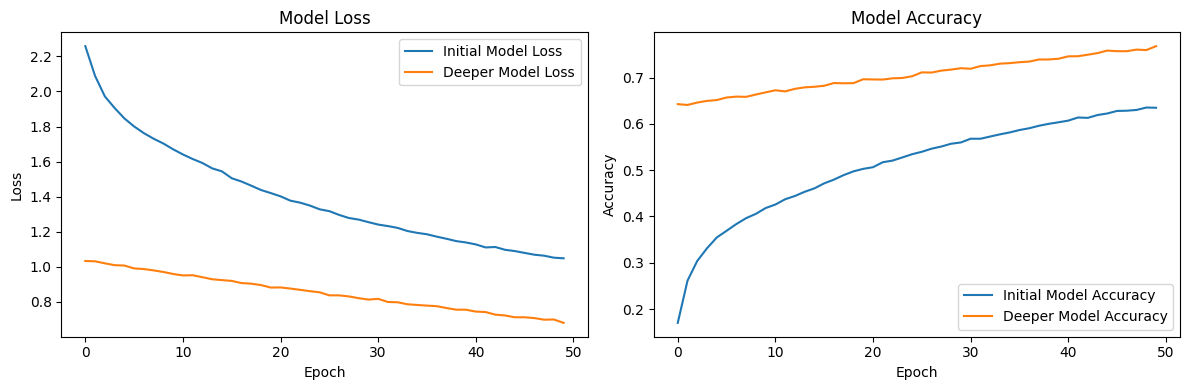

In [33]:
import matplotlib.pyplot as plt

# Assuming you have history objects for both models: history1 (initial model), history2 (deeper model)

plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Initial Model Loss')
plt.plot(history_1.history['loss'], label='Deeper Model Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Initial Model Accuracy')
plt.plot(history_1.history['accuracy'], label='Deeper Model Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

**Comment on the observation**

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


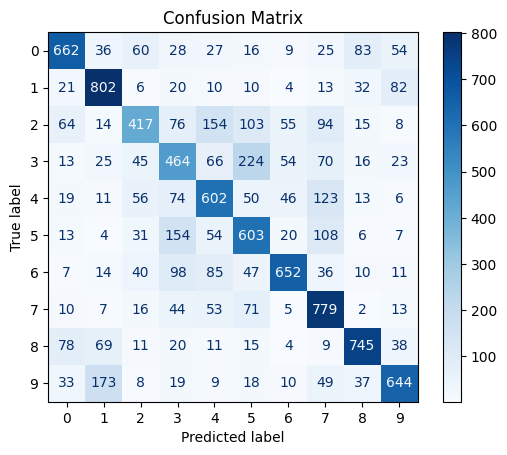

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Get predictions
y_pred_probs = model.predict(x_test)  # Get predicted probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with highest probability

# Get true labels (assuming one-hot encoded)
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))  # Assuming 10 classes (0-9)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [39]:
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.6248999834060669


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [13]:
from keras.backend import clear_session
clear_session()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7720 - loss: 0.6722 - val_accuracy: 0.6355 - val_loss: 1.0886
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7698 - loss: 0.6686 - val_accuracy: 0.6346 - val_loss: 1.0937
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7761 - loss: 0.6594 - val_accuracy: 0.6331 - val_loss: 1.1059
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7785 - loss: 0.6485 - val_accuracy: 0.6298 - val_loss: 1.1111
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7792 - loss: 0.6557 - val_accuracy: 0.6394 - val_loss: 1.0769
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7839 - loss: 0.6351 - val_accuracy: 0.6277 - val_loss: 1.1206
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7846 - loss: 0.6336 - val_accuracy: 0.6421 - val_loss: 1.0744
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7880 - loss: 0.6269 - val_accuracy: 0.6379 - v

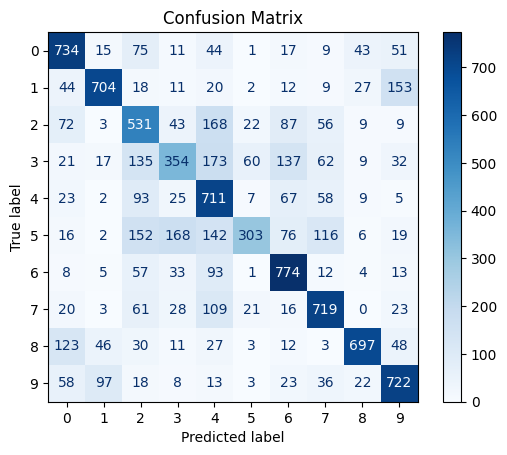

In [37]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model for 10 epochs
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Predict on the test split
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

#1 - Use of activation functions:#

What they do: Activation functions introduce non-linearity into neural networks. They are applied to the output of each neuron (or node) to determine whether it should be "activated" or not. This activation signal is then passed on to the next layer.
Why they are needed:
Non-linearity: Without activation functions, a neural network would simply be a series of linear transformations. This would limit its ability to learn complex patterns and relationships in data. Activation functions allow the network to model non-linear relationships, which is crucial for most real-world problems.
Decision Boundary: Activation functions help create decision boundaries that separate different classes in classification tasks.
Gradient-Based Learning: Many activation functions are differentiable, which allows the network to learn through gradient-based optimization methods like backpropagation.


_

#2 - Key Differences between sigmoid and softmax:#
Sigmoid:
Output Range: 0 to 1
Use Case: Binary classification (predicting one of two classes).
Formula: sigmoid(x) = 1 / (1 + exp(-x))
Interpretation: The output can be interpreted as the probability of belonging to the positive class.
Softmax:
Output Range: A probability distribution over multiple classes (sums to 1).
Use Case: Multi-class classification (predicting one of several classes).
Formula: softmax(x_i) = exp(x_i) / sum(exp(x_j)) for all j
Interpretation: The output for each class represents the probability of belonging to that class, relative to the other classes.



_

#3 - Key Differences between categorical crossentropy and binary crossentropy loss:#


Categorical Cross-entropy:
Use Case: Multi-class classification where the target variable is one-hot encoded (e.g., [0, 0, 1, 0] for 4 classes).
Calculation: Measures the dissimilarity between the predicted probability distribution (from softmax) and the true one-hot encoded labels.
Goal: Minimize the difference between the predicted and true probability distributions.
Binary Cross-entropy:
Use Case: Binary classification where the target variable is a single value (0 or 1).
Calculation: Measures the dissimilarity between the predicted probability (from sigmoid) and the true binary label.
Goal: Minimize the difference between the predicted probability and the true label.
Key Differences:
Target Variable: Categorical cross-entropy uses one-hot encoded labels, while binary cross-entropy uses single binary values.
Output Layer Activation: Categorical cross-entropy is typically used with softmax, while binary cross-entropy is used with sigmoid.
Number of Classes: Categorical cross-entropy is for multi-class problems, while binary cross-entropy is for binary problems.



_


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def improved_model():
    model = keras.Sequential(
        [
            keras.Input(shape=(32, 32, 3)),

            # Convolutional layers with Batch Normalization and Dropout
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Dropout(0.2),  # Dropout after Batch Normalization

            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Dropout(0.2),  # Dropout after Batch Normalization

            layers.MaxPooling2D(pool_size=(2, 2)),

            layers.Flatten(),

            # Dense layer with Batch Normalization and Dropout
            layers.Dense(128, activation="relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),  # Higher dropout rate for dense layer

            layers.Dense(10, activation="softmax"),
        ]
    )
    return model

In [ ]:
# Assuming you have already created the improved model using:
# model = improved_model()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the model
history2 = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

In [40]:
# Predict on the test split
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_testhgh, axis=1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.6248999834060669
